# Sales Analysis using Python Pandas.

### Importing Required Modules

In [2]:
import pandas as pd

In [3]:
import os

#### Task 1 Updating data into one single file

In [4]:
file=[f for f in os.listdir('C:\\Pandas\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')]
for i in file:
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
months_data=pd.DataFrame()
for i in file:
    df=pd.read_csv("C:\\Pandas\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"+i)
    months_data=pd.concat([months_data,df])
months_data.head(5)
months_data.size

1121100

#### Task 2 Cleaning Null values

In [6]:
months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
months_data.dropna(how="all",inplace=True)

In [8]:
months_data.isna().sum().sum()

0

In [9]:
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 3 Creating Month Columns

In [10]:
months_data["month"]=list(map(lambda x: x[:2],months_data["Order Date"]))

In [11]:
#months_data.head()
months_data=months_data[months_data.month!="Or"]

In [12]:
df=months_data.copy()
df["month"]=df["month"].astype("int32")

In [13]:
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [14]:
df["Quantity Ordered"]=df["Quantity Ordered"].astype("int32")
df["Price Each"]=df["Price Each"].astype("float32")

#### Task 4 Creating total price column

In [15]:
df["total_price"]=round(df["Quantity Ordered"]*df["Price Each"],2)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_price
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 5 Creating City Column

In [16]:
def get_city(x):
    y=x.split(",")
    return y[1].strip()
df["city"]=list(map(lambda x : get_city(x),df["Purchase Address"]))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_price,city
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Q1 What was the best month for sales? How much was earned that month?

In [17]:
df.groupby("month").sum().reset_index()[["month","total_price"]].sort_values(by="total_price",ascending=False)

,month,total_price
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


In [18]:
df.groupby("month").sum().reset_index()[["month","total_price"]].sort_values(by="total_price",ascending=False)[:1]

,month,total_price
11,12,4613443.34


### Q2 Which city made maximum revenue?

In [36]:
df11=df[["city","total_price"]]
df11.groupby("city").sum().reset_index().sort_values(by="total_price",ascending=False)

,city,total_price
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


In [37]:
df11.groupby("city").sum().reset_index()[["city","total_price"]].sort_values(by="total_price",ascending=False)[:1]

,city,total_price
7,San Francisco,8262203.91


In [38]:
df["Order Date"]=pd.to_datetime(df["Order Date"],errors="ignore")

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_price,city,quarter,hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2,9


### Q3 In which Quarter the sales was maximum?

In [40]:
def get_quarter(x):
    if x in [1,2,3]:
        return 1
    elif x in [4,5,6]:
        return 2
    elif x in [7,8,9]:
        return 3 
    else:
        return 4

In [41]:
df["quarter"]=df.month.apply(lambda x : get_quarter(x))
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_price,city,quarter,hour
18400,276908,Lightning Charging Cable,1,14.950000,2019-10-25 18:59:00,"636 7th St, Los Angeles, CA 90001",10,14.95,Los Angeles,4,18
20789,315524,Flatscreen TV,1,300.000000,2019-12-03 09:57:00,"489 Madison St, Seattle, WA 98101",12,300.00,Seattle,4,9
10183,171742,AA Batteries (4-pack),1,3.840000,2019-03-25 22:46:00,"240 2nd St, Boston, MA 02215",3,3.84,Boston,1,22
12614,188584,Wired Headphones,1,11.990000,2019-04-06 20:28:00,"53 Ridge St, Austin, TX 73301",4,11.99,Austin,2,20
1052,279801,Google Phone,1,600.000000,2019-11-23 09:02:00,"581 Chestnut St, Dallas, TX 75001",11,600.00,Dallas,4,9
8197,169832,Bose SoundSport Headphones,1,99.989998,2019-03-21 19:26:00,"365 Elm St, Atlanta, GA 30301",3,99.99,Atlanta,1,19
6942,216532,Lightning Charging Cable,1,14.950000,2019-06-22 10:30:00,"268 West St, New York City, NY 10001",6,14.95,New York City,2,10
12377,307476,Wired Headphones,1,11.990000,2019-12-08 14:20:00,"492 Cherry St, Los Angeles, CA 90001",12,11.99,Los Angeles,4,14
6360,215966,AA Batteries (4-pack),1,3.840000,2019-06-28 21:53:00,"292 Cherry St, New York City, NY 10001",6,3.84,New York City,2,21
6286,168003,Lightning Charging Cable,1,14.950000,2019-03-30 00:20:00,"360 Lakeview St, Los Angeles, CA 90001",3,14.95,Los Angeles,1,0


In [42]:
df1=df[["quarter","total_price"]]
df1.groupby("quarter").sum().reset_index().sort_values(by="total_price",ascending=False)

,quarter,total_price
3,4,11549773.42
1,2,9121079.25
2,3,6989803.77
0,1,6831379.53


In [43]:
df1.groupby("quarter").sum().reset_index()[["quarter","total_price"]].sort_values(by="total_price",ascending=False)[:1]

,quarter,total_price
3,4,11549773.42


### Q4 What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [54]:
df["hour"]=df["Order Date"].dt.hour
df1=df[["hour","total_price"]]
df1.groupby("hour").sum().reset_index().sort_values(by="total_price",ascending=False)

,hour,total_price
19,19,2412938.54
12,12,2316821.34
11,11,2300610.24
20,20,2281716.24
18,18,2219348.30
13,13,2155389.80
17,17,2129361.61
14,14,2083672.73
21,21,2042000.86
10,10,1944286.77


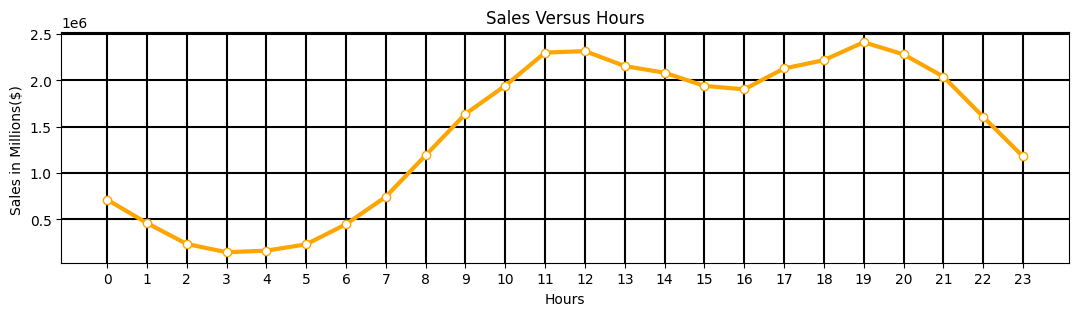

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
a=[h for h,d in df1.groupby("hour")]
plt.figure(figsize=(13,3))
plt.plot(a,df1.groupby("hour").sum(),marker="o",color="orange",linewidth=3,mfc="white")
plt.xticks(a)
plt.title("Sales Versus Hours")
plt.ylabel("Sales in Millions($) ")
plt.xlabel("Hours")
plt.grid(color="k",linewidth=1.5)

### Q5 What product sold the most?

In [55]:
df2=df[["Product","Quantity Ordered"]]
df2.groupby("Product").sum().reset_index().sort_values(by="Quantity Ordered",ascending=False)
df2.groupby("Product").sum().reset_index().sort_values(by="Quantity Ordered",ascending=False)[:1]

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017


### Q6 What product sold the most? In each month.

In [49]:
df3=df[["month","Product","Quantity Ordered"]]
df4=df3.groupby(["month","Product"]).sum().reset_index().sort_values(by=["month","Quantity Ordered"],ascending=[1,0])
df4["rn"]=df4.sort_values(["month","Quantity Ordered"], ascending=[True,False]) \
             .groupby(['month']) \
             .cumcount() + 1
df5=df4[df4.rn==1]
df5[["month","Product","Quantity Ordered"]]

,month,Product,Quantity Ordered
5,1,AAA Batteries (4-pack),1600
24,2,AAA Batteries (4-pack),1972
43,3,AAA Batteries (4-pack),2479
62,4,AAA Batteries (4-pack),2939
81,5,AAA Batteries (4-pack),2927
100,6,AAA Batteries (4-pack),2162
119,7,AAA Batteries (4-pack),2365
138,8,AAA Batteries (4-pack),2021
157,9,AAA Batteries (4-pack),1923
176,10,AAA Batteries (4-pack),3363


### Q7  Find all cities with their number of products sold.

In [50]:
df8=df[["city","Quantity Ordered"]]
df8.groupby("city").sum().reset_index().sort_values(by="Quantity Ordered",ascending=0)

,city,Quantity Ordered
7,San Francisco,50239
4,Los Angeles,33289
5,New York City,27932
2,Boston,22528
3,Dallas,16730
0,Atlanta,16602
8,Seattle,16553
6,Portland,14053
1,Austin,11153


### Q8 Which Order id gave Maximum Revenue?

In [51]:
df9=df[["Order ID","total_price"]]
df10=df9.groupby("Order ID").count().reset_index()
df10[df10.total_price>1]

,Order ID,total_price
41,141275,2
56,141290,2
131,141365,2
150,141384,2
216,141450,2
...,...,...
178302,319536,2
178322,319556,2
178350,319584,2
178362,319596,2


In [52]:
df9.groupby("Order ID").sum().reset_index().sort_values(by="total_price",ascending=0)

,Order ID,total_price
39835,181069,3779.99
102494,243728,3400.00
60978,202212,3400.00
40310,181544,3400.00
59294,200528,3400.00
...,...,...
14094,155328,2.99
37360,178594,2.99
127537,268771,2.99
107282,248516,2.99


In [53]:
df9.groupby("Order ID").sum().reset_index().sort_values(by="total_price",ascending=0)[:1]

,Order ID,total_price
39835,181069,3779.99
